In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy import stats
import sklearn
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')


from scipy import stats
from scipy.stats import norm, skew

In [2]:
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train_data.shape

(1460, 81)

In [4]:
test_data.shape

(1459, 80)

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Let us look at the columns a bit closely.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

# **EDA**

## Handling Null Values

We find out the columns containing null values.

> **Why?** : These null values adversely affect the performance and accuracy of any machine learning algorithm.

In [8]:
# Finding the null values columnwise
na_vals=train_data.isna().sum()
na_cols = na_vals.drop(na_vals[na_vals==0].index).sort_values(ascending=False)

na_test_vals=test_data.isna().sum()
na_test_cols = na_test_vals.drop(na_test_vals[na_test_vals==0].index).sort_values(ascending=False)

na_cols

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [9]:
na_cols.dtype

dtype('int64')

In [10]:
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([na_vals, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.drop(na_vals[na_vals==0].index)
missing_data=missing_data.sort_values('Percent',ascending=False)
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [11]:
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_test_data = pd.concat([na_test_vals, percent], axis=1, keys=['Total', 'Percent'])
missing_test_data = missing_test_data.drop(na_test_vals[na_test_vals==0].index)
missing_test_data=missing_test_data.sort_values('Percent',ascending=False)
print(missing_test_data)

test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mode()[0], inplace=True)
test_data['BsmtHalfBath'].fillna(test_data['BsmtFullBath'].mode()[0], inplace=True)
test_data['BsmtFinSF1'].fillna(test_data['BsmtFullBath'].mode()[0], inplace=True)
test_data['BsmtFinSF2'].fillna(test_data['BsmtFullBath'].mode()[0], inplace=True)
test_data['TotalBsmtSF'].fillna(test_data['BsmtFullBath'].mode()[0], inplace=True)
test_data['GarageArea'].fillna(test_data['BsmtFullBath'].mode()[0], inplace=True)
test_data['BsmtUnfSF'].fillna(test_data['BsmtFullBath'].mode()[0], inplace=True)

              Total   Percent
PoolQC         1456  0.997944
MiscFeature    1408  0.965045
Alley          1352  0.926662
Fence          1169  0.801234
FireplaceQu     730  0.500343
LotFrontage     227  0.155586
GarageCond       78  0.053461
GarageYrBlt      78  0.053461
GarageQual       78  0.053461
GarageFinish     78  0.053461
GarageType       76  0.052090
BsmtCond         45  0.030843
BsmtExposure     44  0.030158
BsmtQual         44  0.030158
BsmtFinType1     42  0.028787
BsmtFinType2     42  0.028787
MasVnrType       16  0.010966
MasVnrArea       15  0.010281
MSZoning          4  0.002742
BsmtFullBath      2  0.001371
BsmtHalfBath      2  0.001371
Functional        2  0.001371
Utilities         2  0.001371
GarageCars        1  0.000685
GarageArea        1  0.000685
TotalBsmtSF       1  0.000685
KitchenQual       1  0.000685
BsmtUnfSF         1  0.000685
BsmtFinSF2        1  0.000685
BsmtFinSF1        1  0.000685
Exterior2nd       1  0.000685
Exterior1st       1  0.000685
SaleType  

Based on the above percentage, we drop the columns if the percentage of missing values is more than 0.1.

In [12]:
train_data = train_data.drop((missing_data[missing_data['Percent'] > 0.1]).index,1)

In [13]:
test_data = test_data.drop((missing_test_data[missing_test_data['Percent'] > 0.1]).index,1)

Since we do not need the column 'ID', we will drop the column after storing it for using later.

In [14]:
train_ID = train_data['Id']
test_ID = test_data['Id']

train_data.drop("Id", axis = 1, inplace = True)
test_data.drop("Id", axis = 1, inplace = True)

In [15]:
train_data.shape

(1460, 74)

In [16]:
test_data.shape

(1459, 73)

Since 'GarageType', 'GarageFinish', 'GarageQual' and 'GarageCond' are categorical values, we will fill their missing values with 'None', and those of 'GarageYrBlt', 'GarageCars' are numeric, so them with '0'.

In [17]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_data[col] = train_data[col].fillna('None')


for col in ('GarageYrBlt', 'GarageCars'):
    train_data[col] = train_data[col].fillna(0)

In [18]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test_data[col] = test_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageCars'): 
    test_data[col] = test_data[col].fillna(0)

Similarly for the columns 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2').

In [19]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_data[col] = train_data[col].fillna('None')

In [20]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test_data[col] = train_data[col].fillna('None')

In [21]:
train_data["MasVnrType"] = train_data["MasVnrType"].fillna("None")
train_data["MasVnrArea"] = train_data["MasVnrArea"].fillna(0)

In [22]:
test_data["MasVnrType"] = test_data["MasVnrType"].fillna("None")
test_data["MasVnrArea"] = test_data["MasVnrArea"].fillna(0)

In [23]:
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])

In [24]:
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])

## Outlier Detection 
#### Scatter Plot and Box Plot

> **Why ?** Outliers are unusual values in the dataset, and they can distort statistical analyses and violate their assumptions.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

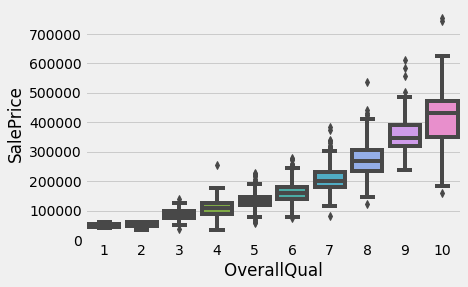

In [25]:
sns.boxplot(y='SalePrice', x = 'OverallQual', data=train_data)

Let us look for outliers in columns like GrLivArea. We do this using **scatterplot**.

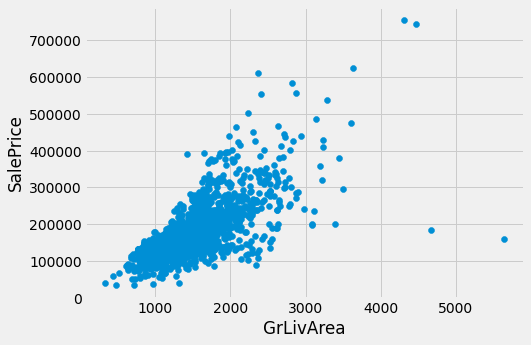

In [26]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(train_data['GrLivArea'], train_data['SalePrice'])
ax.set_ylabel('SalePrice')
ax.set_xlabel('GrLivArea')
plt.show()

The points having GrLivArea greater that 4000 are outliers for this case, and hence we drop those values.

In [27]:
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000)].index)

If we check again, these outliers have now been removed.

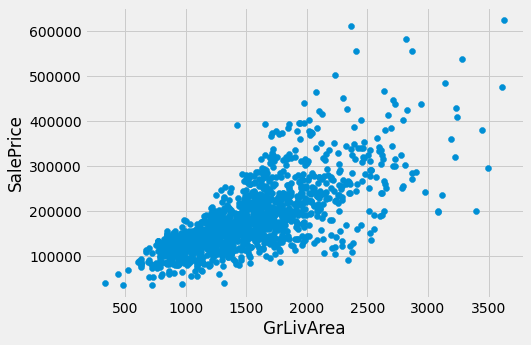

In [28]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(train_data['GrLivArea'], train_data['SalePrice'])
ax.set_ylabel('SalePrice')
ax.set_xlabel('GrLivArea')
plt.show()

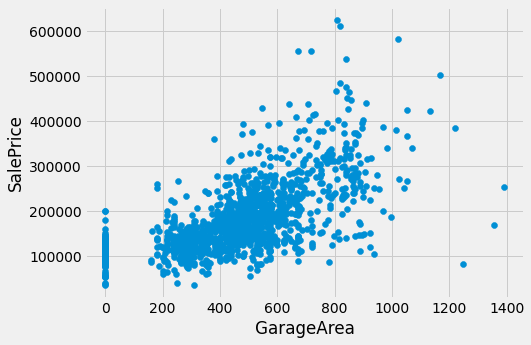

In [29]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(train_data['GarageArea'], train_data['SalePrice'])
ax.set_ylabel('SalePrice')
ax.set_xlabel('GarageArea')
plt.show()

Since there are no extreme outliers, it is preferred not to drop any values. 

Let us also look at the scatter plots of other columns against 'SalePrice'.

In [30]:
training_data=train_data.copy()
training_data.drop(['SalePrice'],axis=1)
data = pd.concat([training_data,test_data], axis=0)
data.drop(['SalePrice'],axis=1,inplace=True)

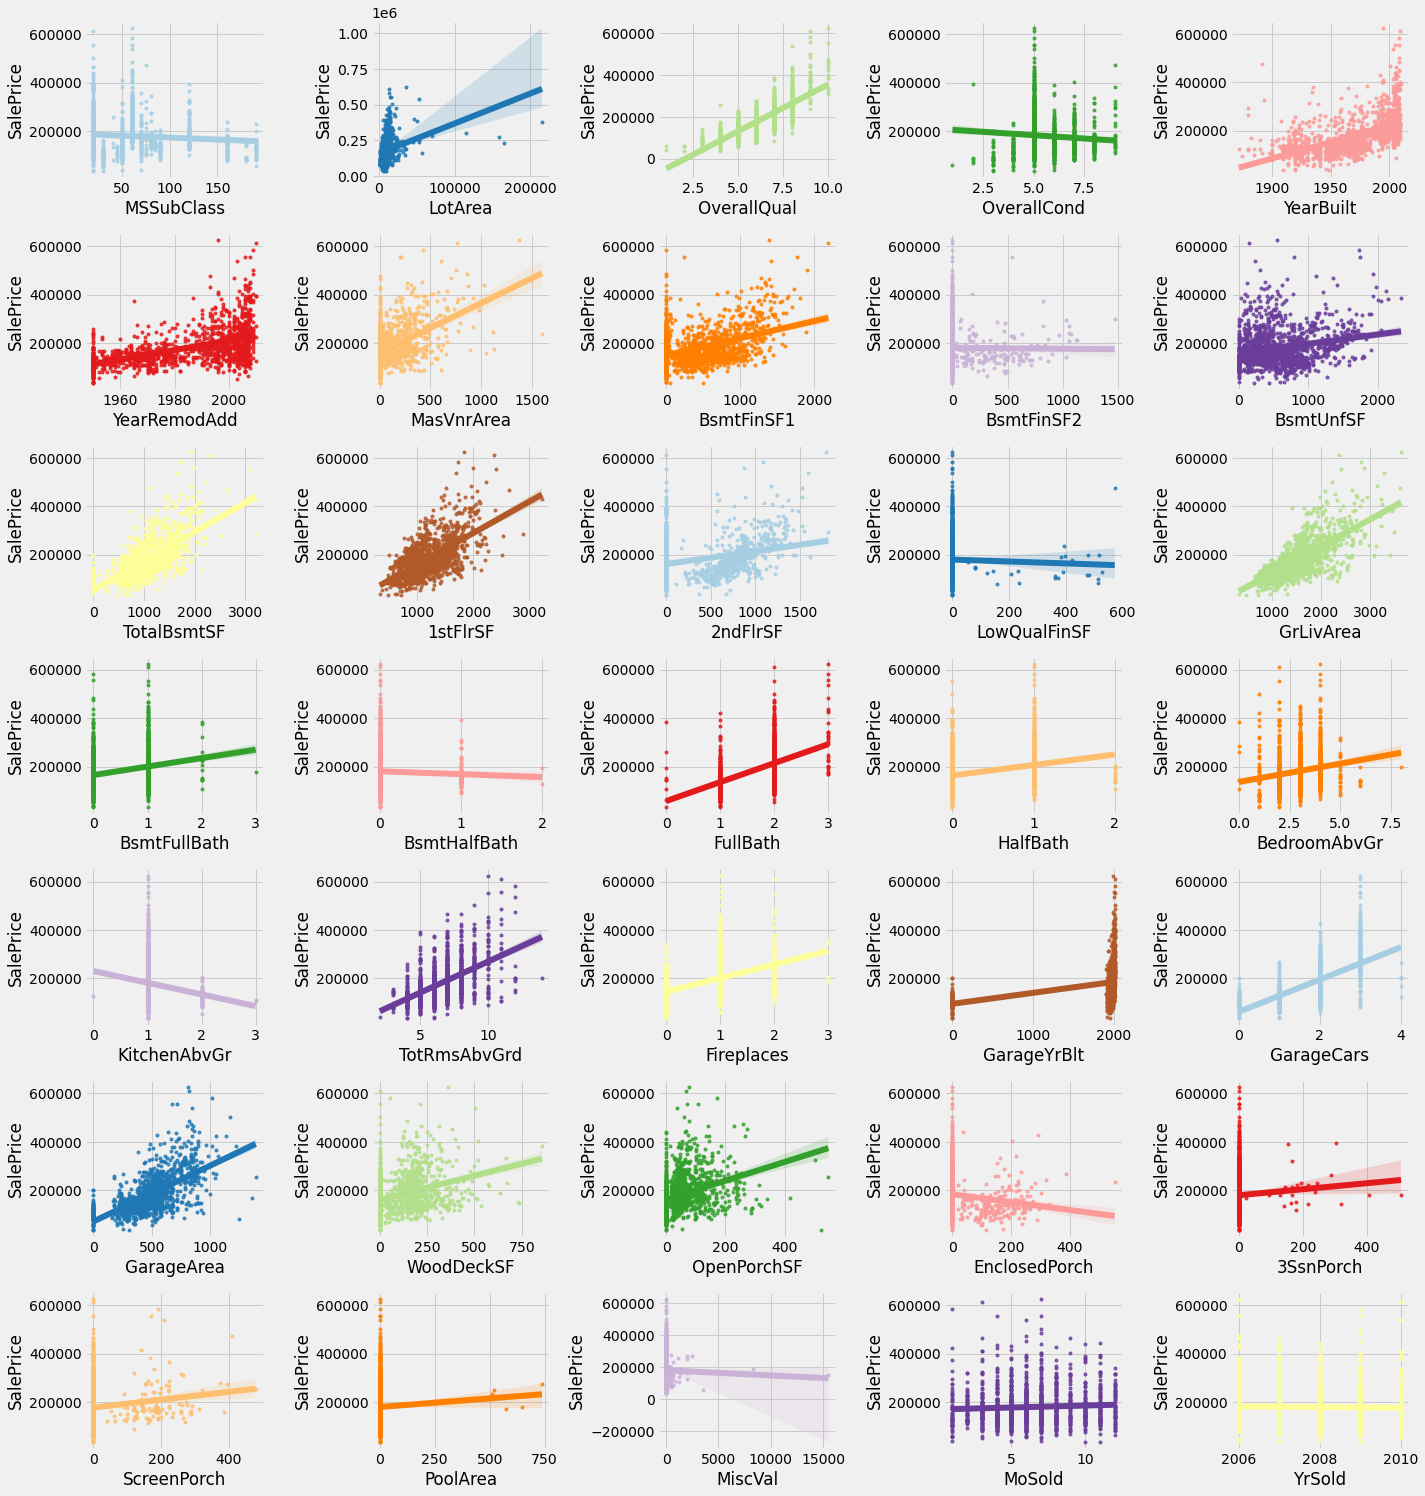

In [31]:
numRows = 7
numCols = 5
 
fig, axes = plt.subplots(numRows, numCols,figsize=(20,21))
palette= sns.color_palette("Paired", 40)

numerical_cols = training_data.dtypes[training_data.dtypes != "object"].index
listNum = list(numerical_cols)

x=-1
for num in range(0, numRows):
    for col in range(0, numCols):  
        i = num * numCols + col
        if i < len(listNum):
            x += 1
            sns.regplot(training_data[listNum[i]], training_data['SalePrice'], ax = axes[num][col],color = palette[x],marker=".")  
plt.tight_layout()    
plt.show()

## Label Encoding

Before we apply label encoding, let us look at the categorical variables at hand and their composition.

In [32]:
from sklearn.preprocessing import LabelEncoder
data = training_data.copy()
categorical_features= data.select_dtypes(include=['object']).copy()
number=[len(data[features].unique()) for features in categorical_features]
data_tuples = list(zip(categorical_features,number))
categorical_data= pd.DataFrame(data_tuples, columns=['Features','Number of distinct values '])
categorical_data

,Features,Number of distinct values
0,MSZoning,5
1,Street,2
2,LotShape,4
3,LandContour,4
4,Utilities,2
5,LotConfig,5
6,LandSlope,3
7,Neighborhood,25
8,Condition1,9
9,Condition2,8


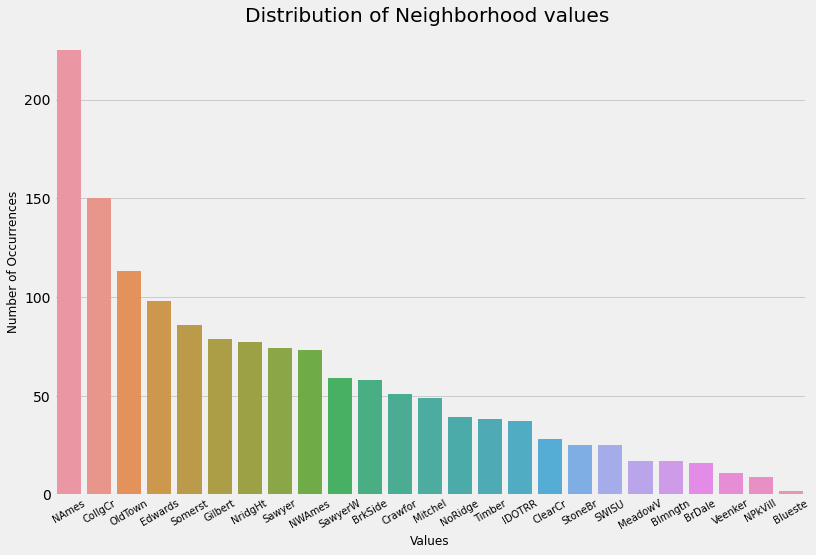

In [33]:
#Visualizing the values in 'Neighborhood'
plt.figure(figsize=(12,8))
n_count = data['Neighborhood'].value_counts()
plot=sns.barplot(n_count.index, n_count.values)
plt.setp(plot.get_xticklabels(), rotation=30, fontsize=10)
plt.title('Distribution of Neighborhood values ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Values', fontsize=12)
plt.show()

Text(0, 0.5, '')

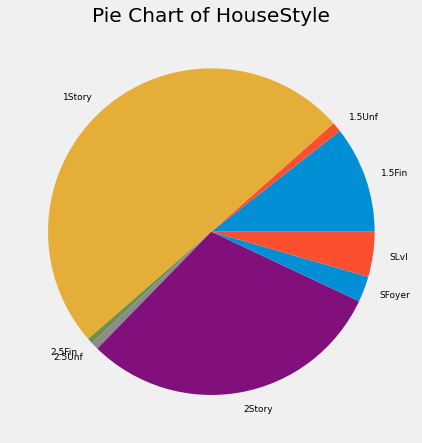

In [34]:
pieplot = data.groupby('HouseStyle').size()

pieplot.plot(kind='pie', subplots=True, figsize=(7, 7), fontsize=9)
plt.title("Pie Chart of HouseStyle")
plt.ylabel("")

In [35]:
for c in categorical_features:
    label_encoder = LabelEncoder() 
    label_encoder.fit(list(data[c].values)) 
    data[c] = label_encoder.transform(list(data[c].values))
    
training_data=data.copy()

In [36]:
data = test_data.copy()
categorical_features = [features for features in data.columns if data[features].dtype == 'O']
    
for c in categorical_features:
    label_encoder = LabelEncoder() 
    label_encoder.fit(list(data[c].values)) 
    data[c] = label_encoder.transform(list(data[c].values))
    
test_data=data

# Checking the Four Assumptions

Before moving on to building the regression model, we must test the assumptions underlying the statistical bases for multivariate analysis.

#### **1. Correlation**

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

> **Why?** When independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. The stronger the correlation, the more difficult it is to change one variable without changing another.

<AxesSubplot:>

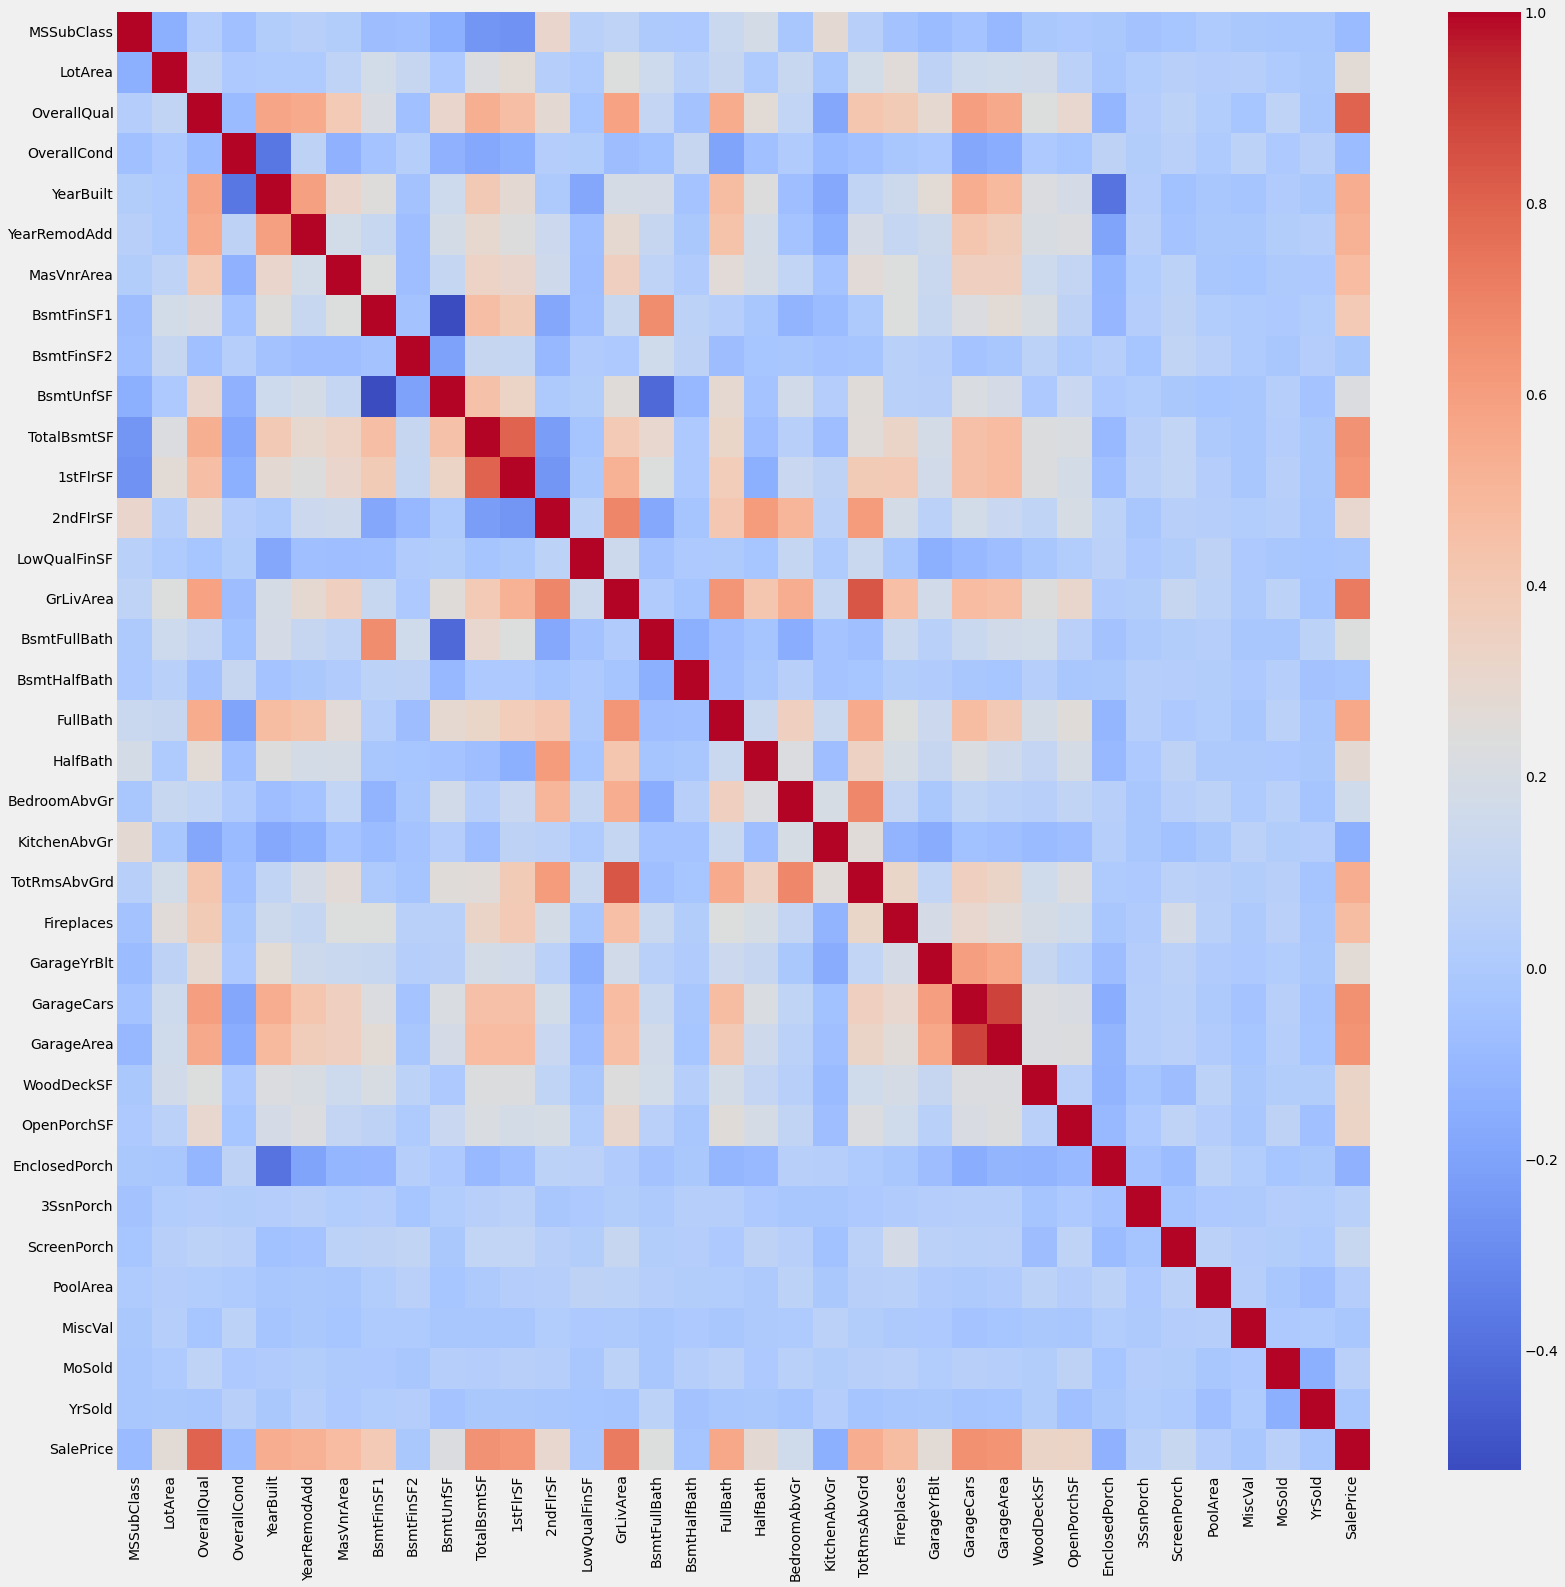

In [37]:
corrmat = train_data.corr()
plt.subplots(figsize=(25,25))
sns.heatmap(corrmat,fmt = ".1f", cmap = "coolwarm")

#### More correlation

We check for high correlation in the following steps.

In [38]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    for i , index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df2 = pd.DataFrame(data = value, index=feature, columns=['corr value'] )
    return df2

corr_df = getCorrelatedFeature(corrmat['SalePrice'], 0.5)
corr_df.sort_values(by=['corr value'],ascending=False)

,corr value
SalePrice,1.000000
OverallQual,0.800858
GrLivArea,0.720516
GarageCars,0.649256
TotalBsmtSF,0.646584
GarageArea,0.636964
1stFlrSF,0.625235
FullBath,0.559048
TotRmsAbvGrd,0.537462
YearBuilt,0.535279


#### **2. Linearity**

The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen above appear to have linear relationships.

>**Why?** If you fit a linear model to a non-linear, non-additive data set, the regression algorithm would fail to capture the trend mathematically, thus resulting in an inefficient model.

#### **3. Homoscedasticity**

Homoscedasticity refers to the assumption that dependent variable(s) exhibit equal, constant levels of variance across the range of predictor variable(s).

>**Why?** If the variance of the errors is increasing over time, confidence intervals for out-of-sample predictions will tend to be unrealistically narrow. It  may also have the effect of giving too much weight to a small subset of the data when estimating coefficients.

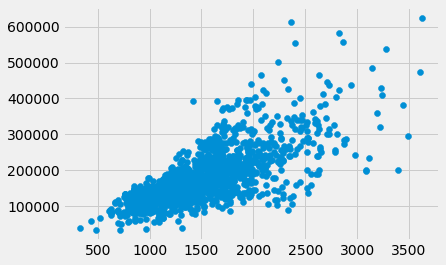

In [39]:
plt.scatter(train_data.GrLivArea, train_data.SalePrice);

We observe that there is heteroscedasticity present. 

(The plot should look like a tube/pipe, not a funnel.)

We try to remove it in the following code.

#### **4. Normality of Errors**

The data should look like a normal distribution. Several statistic tests, like the t-tests, rely on the normal distribution of error terms.

>**Why?** Calculation of confidence intervals and various significance tests for coefficients are all based on the assumptions of normally distributed errors. If the error distribution is significantly non-normal, confidence intervals may be too wide or too narrow.

Skewness: 1.565959
Kurtosis: 3.885283



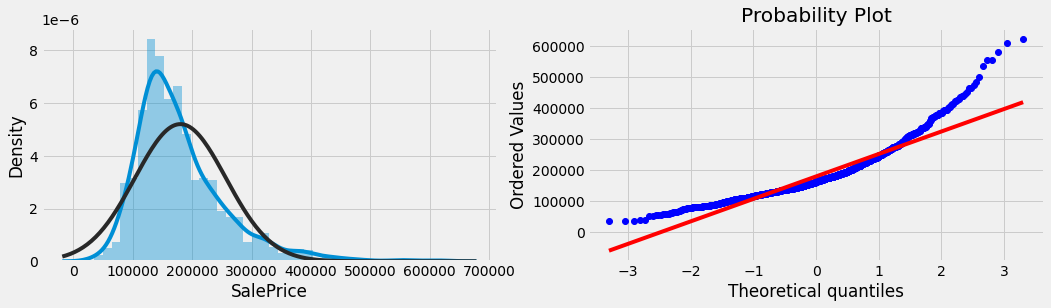

In [40]:
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())
print()
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.distplot(train_data['SalePrice'] , fit=norm, ax=ax[0])
#Get also the QQ-plot
res = stats.probplot(train_data['SalePrice'],plot=ax[1])
plt.show()

The figures show that the target variable has peakedness, and the QQ plot shows that the target variable "SalePrice" has right (positive) skewness.

We will apply log transformation to make the variables normally distributed, i.e, achieve normality of errors.

In [41]:
train_data['SalePrice'] = np.log(train_data['SalePrice'])

Skewness: 0.065449
Kurtosis: 0.666438



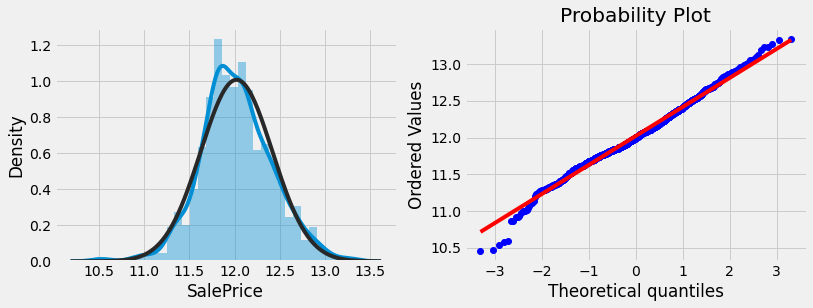

In [42]:
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())
print()
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.distplot(train_data['SalePrice'] , fit=norm, ax=ax[0])
#Get also the QQ-plot
res = stats.probplot(train_data['SalePrice'],plot=ax[1])
plt.show()

Now let's come back to check the difference upon homoscedasticity.

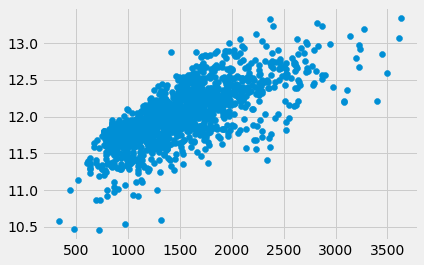

In [43]:
plt.scatter(train_data.GrLivArea, train_data.SalePrice);

The heteroscedasticity has been removed now, owing to the log transformation that we put 'Saleprice' through.

Note : Heteroscedasticity where the spread is close to proportional to the conditional mean will tend to be improved by taking log(y), but if it's not increasing with the mean at close to that rate (or more), then the heteroscedasticity will often be made worse by that transformation.

### Box-Cox Transformation

We will now apply box-cox transformation on the training data so as to normalize our training attributes as well.

In [44]:
#Box-cox transformation on training_data and test_data
numeric_feats =training_data.dtypes[training_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = training_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Utilities,38.118246
MiscVal,24.418175
PoolArea,17.504556
Condition2,13.666839
LotArea,12.574590
3SsnPorch,10.279262
Heating,9.831083
LowQualFinSF,8.989291
RoofMatl,8.293646
LandSlope,4.801326


In [45]:
skewness = skewness[abs(skewness) > 0.75]

from scipy.special import boxcox1p
skewed_features = skewness.index
lambda_value = 0.15
for feat in skewed_features:
    training_data[feat] = boxcox1p(training_data[feat], lambda_value)

In [46]:
numeric_feats =test_data.dtypes[test_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = test_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness) > 0.75]

skewed_features = skewness.index
lambda_value = 0.15
for feat in skewed_features:
    test_data[feat] = boxcox1p(test_data[feat], lambda_value)

In [47]:
# final_data=train_data.copy()
# final_data.drop(['SalePrice'],axis=1)
# X_train=final_data
# X_train= X_train.drop(['SalePrice'],axis=1)
# y_train=train_data['SalePrice'].values

# feature_sel_model = SelectFromModel(Lasso(alpha=0.015,random_state=0))
# feature_sel_model.fit(X_train,y_train)
# feature_sel_model.get_support()

# total_selected=X_train.columns[(feature_sel_model.get_support())]
# len(total_selected)

In [48]:
final_data=training_data.copy()
final_data.drop(['SalePrice'],axis=1)
X_train=final_data
X_train= X_train.drop(['SalePrice'],axis=1)
y_train=train_data['SalePrice'].values
X_test=test_data

# Building the Model

In [49]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso


def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits=7,shuffle=True,random_state=42)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score = [r2_val_score.mean()]
    return score

#### Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression, Ridge
LR = LinearRegression(normalize=True, n_jobs=-1)
LR.fit(X_train,y_train)
test_model(LR)

[-9.62824851152991e+22]

#### Ridge Regression

In [51]:
RidR = Ridge(alpha = 0.5, normalize=True)
RidR.fit(X_train,y_train)
test_model(RidR)

[0.8928009672111852]

#### Lasso Regression

In [52]:
LasR = Lasso(alpha = 0.001, normalize=True)
LasR.fit(X_train,y_train)
test_model(LasR)

[0.8566424458715319]

#### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor

DTree = DecisionTreeRegressor(max_depth=8)
DTree.fit(X_train,y_train)
test_model(DTree)

[0.7539112872209423]

#### Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state = 42)
RF.fit(X_train,y_train)
test_model(RF)

[0.8791450191045219]

#### ElasticNet

In [55]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
test_model(ENet)

[0.9061127049514902]

#### XGBoost

In [56]:
import xgboost
xgb = xgboost.XGBRegressor(learning_rate=0.05, max_depth=3, random_state=4)
xgb.fit(X_train,y_train)
test_model(xgb)

[0.8447956249405456]

#### Support Vector Machine

In [57]:
from sklearn.svm import SVR
Svm = SVR(kernel='rbf')
test_model(Svm)

[0.8610831041530514]

#### Light Gradient Boosting

In [58]:
import lightgbm as lgb
model_lgb = lgb.Dataset(X_train, y_train)
params ={ 'objective':'regression',
        'task': 'train',
        'boosting_type': 'gbdt',
        'num_leaves': 42,
        'metric': {'15'},
        'learning_rate': 0.1, 
        'bagging_fraction': 0.8,
        'bagging_freq' : 5,
        'feature_fraction':0.9, 
        'min_data_in_leaf' : 6,
        } 
prediction = lgb.train(params, model_lgb)
y_predict = prediction.predict(X_test)
y_predict = np.expm1(y_predict)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3278
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 71
[LightGBM] [Info] Start training from score 12.021943


In [59]:
pred=np.exp(prediction.predict(X_test)).round(2)

In [60]:
submit_test = pd.concat([test_ID,pd.DataFrame(pred)],axis=1)
submit_test.columns = ['Id','SalePrice']

In [61]:
submit_test.to_csv('submission.csv', index=False)